<a href="https://colab.research.google.com/github/Natalia9922/Weather-Prediction/blob/visual-fixes/weather_project_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import io
from google.colab import files
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Loading Dataset

In [ ]:
# defining a data frame
df = pd.read_csv('/content/weatherHistory.csv',index_col=False)

# Exploratory Data Analysis (EDA)





In [ ]:
# return the first 5 rows
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
# return the last 5 rows
df.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [ ]:
df.shape

(96453, 12)

In [ ]:
df.size

1157436

In [ ]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
# generate descriptive statistics
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


array([[<Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Apparent Temperature (C)'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Wind Bearing (degrees)'}>,
        <Axes: title={'center': 'Visibility (km)'}>],
       [<Axes: title={'center': 'Loud Cover'}>,
        <Axes: title={'center': 'Pressure (millibars)'}>, <Axes: >]],
      dtype=object)

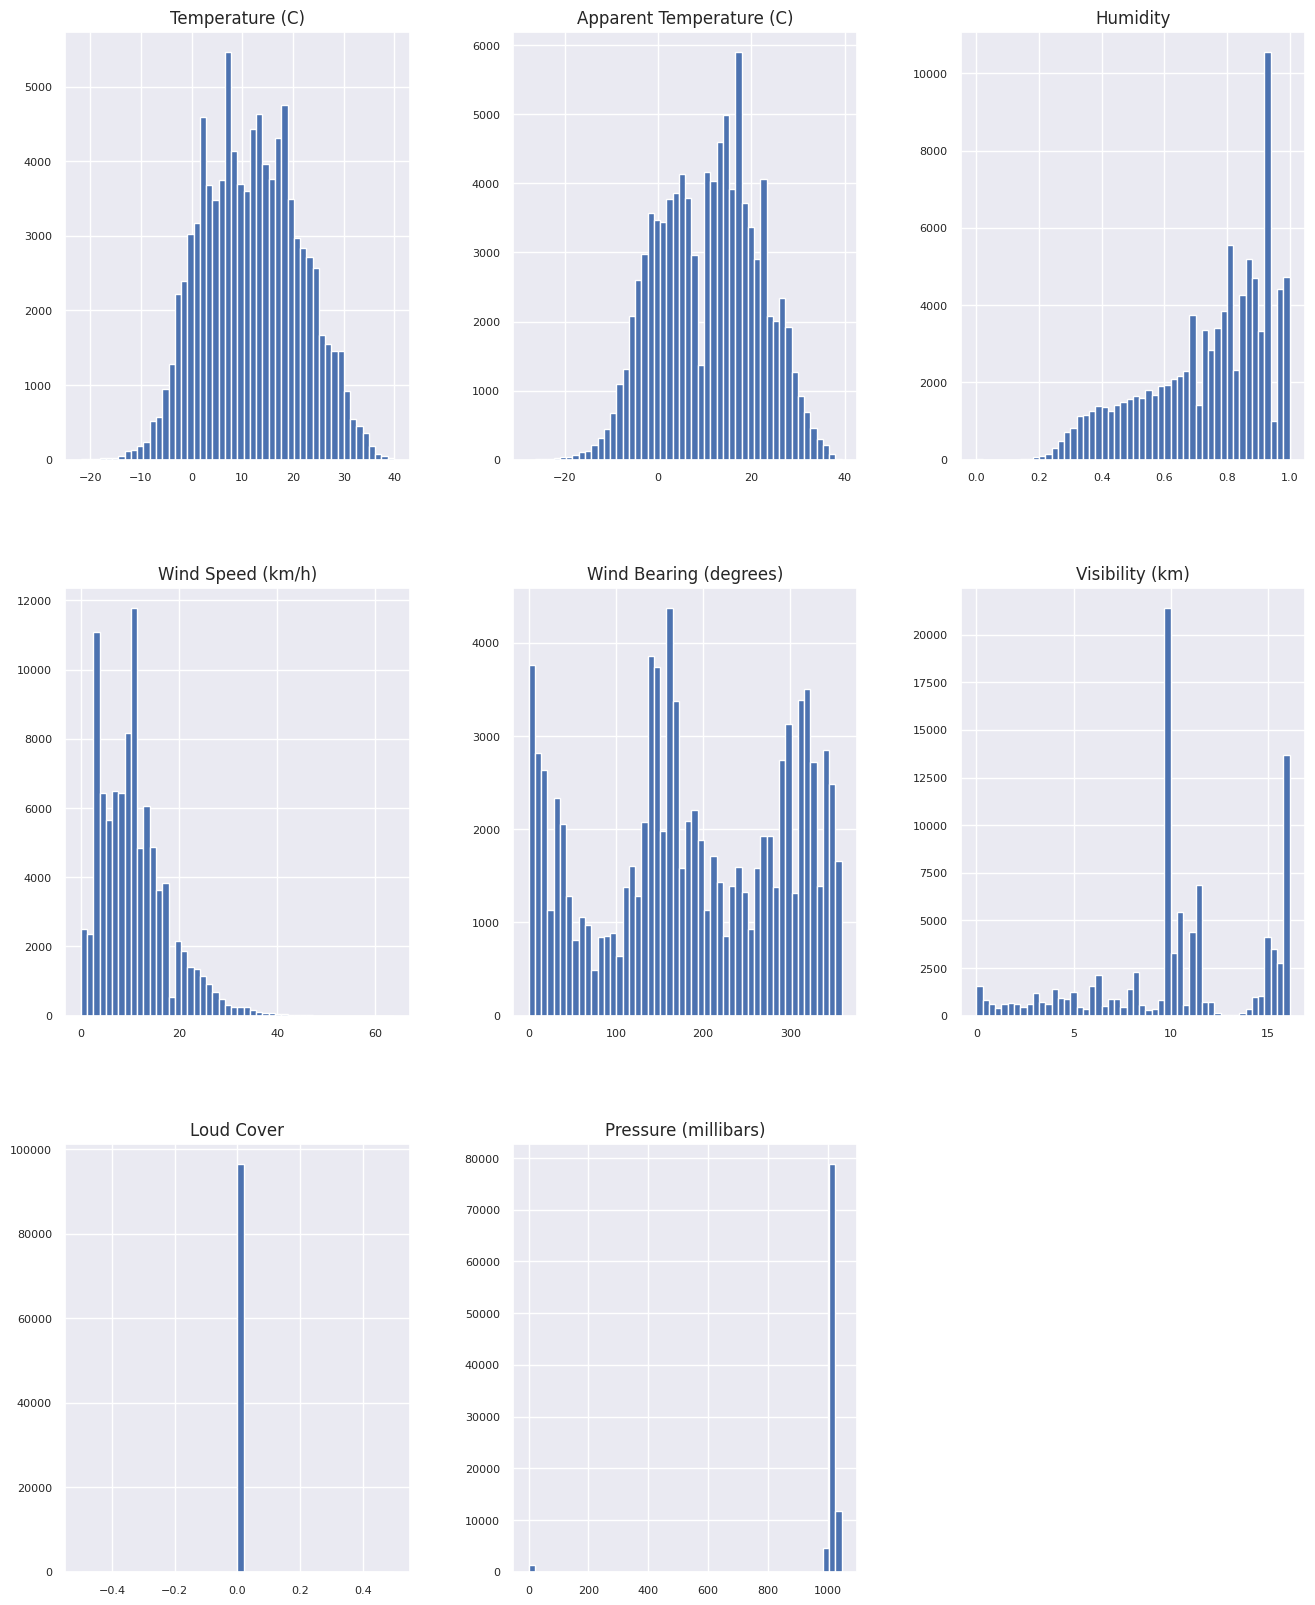

In [ ]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

<ipython-input-422-f28ad7987763>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pressure (millibars)'])


<Axes: xlabel='Pressure (millibars)', ylabel='Density'>

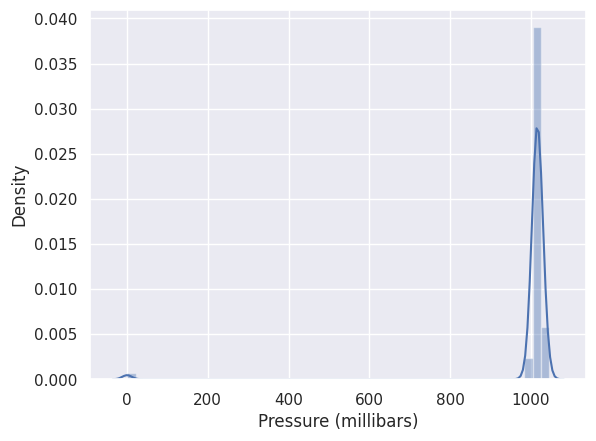

In [ ]:
sns.distplot(df['Pressure (millibars)'])

Observation: Loud Cover column contains 0 itself, Pressure column has incorrect values 0

In [ ]:
# checking missing values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Observation: probably missing a value means that the precip type is not visible,fill it with none

In [ ]:
# duplicate checking
df.duplicated().sum()

24

# Basic Data Cleaning

In [ ]:
def annotate_plot(plots): # defining formats barplot
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')

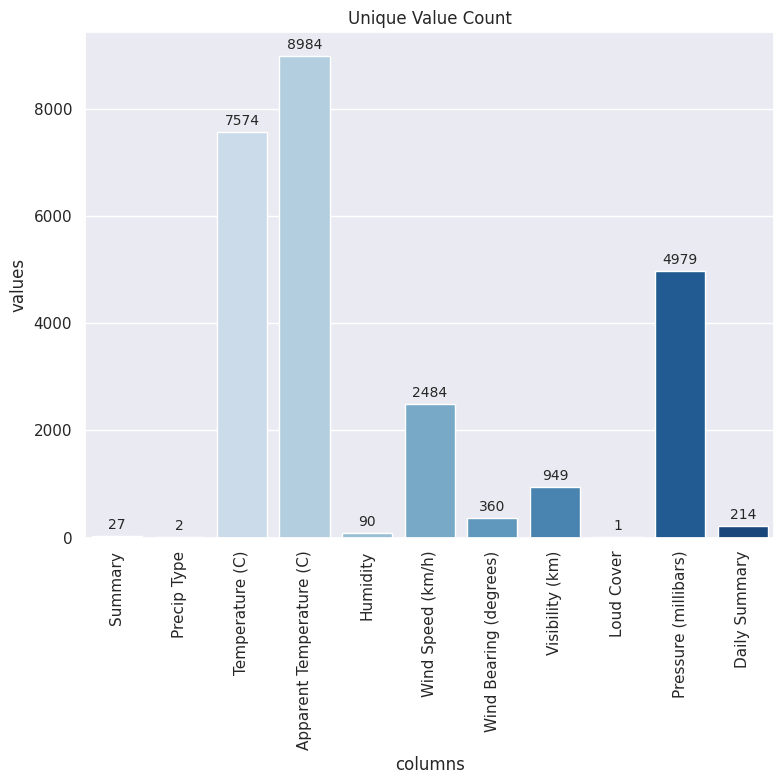

In [ ]:
# creating a barplot of unique values and their quantity
plt.figure(figsize=(8,8))
unique_df = pd.DataFrame(df.apply(lambda x: x.nunique()))
unique_df.drop("Formatted Date",inplace =True)
unique_df = unique_df.reset_index()
unique_df.columns = ["columns","values"]
g = sns.barplot(x="columns",data = unique_df, y= "values", palette = 'Blues' )
annotate_plot(g)
plt.xticks(rotation=90)
plt.title("Unique Value Count")
plt.tight_layout()
plt.show()

In [ ]:
# drop duplicates
df.drop_duplicates(keep="first", inplace=True)

In [ ]:
# drop unnecessary column; Loud Cover all contains 0, one column
df.drop(['Loud Cover'],axis = 1,inplace = True)

In [ ]:
# fill missing values Precip type to none
df.fillna('none', inplace = True)

In [ ]:
df['Precip Type'].value_counts()

rain    85200
snow    10712
none      517
Name: Precip Type, dtype: int64

In [ ]:
# drop incorrect pressure values 0
df = df.loc[df['Pressure (millibars)'] != 0]

In [ ]:
# drop unnecessary column; Daily Summary
df.drop(['Daily Summary'],axis = 1,inplace = True)

<ipython-input-432-6efd7d20dd6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Daily Summary'],axis = 1,inplace = True)


# Data Visualization

Categorical columns:

In [ ]:
cat = ['Summary','Precip Type']

print('No. of categorical columns are:',len(cat))

No. of categorical columns are: 2


Numerical columns:

In [ ]:
num = []
for i in df.columns:
    if i not in cat:
        num.append(i)
print('No. of numerical/float columns are:',len(num))

No. of numerical/float columns are: 8


Exploring Categorical Columns/Features

In [ ]:
# Checking the number of unique values for each text column
df['Summary'].value_counts()

Partly Cloudy                          31604
Mostly Cloudy                          27960
Overcast                               16442
Clear                                  10145
Foggy                                   7050
Breezy and Overcast                      525
Breezy and Mostly Cloudy                 511
Breezy and Partly Cloudy                 379
Dry and Partly Cloudy                     86
Light Rain                                63
Windy and Partly Cloudy                   63
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   34
Dry                                       34
Breezy                                    30
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Humid and Overcast                         7
Windy and 

In [ ]:
# describing less significant variables as other
allowed_vals = ['Partly Cloudy',
                'Mostly Cloudy',
                'Overcast',
                'Clear',
                'Foggy',
                'Breezy and Overcast',
                'Breezy and Mostly Cloudy',
                'Breezy and Partly Cloudy'
                ]

df.loc[~df["Summary"].isin(allowed_vals), "Summary"] = "Other"
df.Summary.value_counts()

Partly Cloudy               31604
Mostly Cloudy               27960
Overcast                    16442
Clear                       10145
Foggy                        7050
Breezy and Overcast           525
Other                         525
Breezy and Mostly Cloudy      511
Breezy and Partly Cloudy      379
Name: Summary, dtype: int64

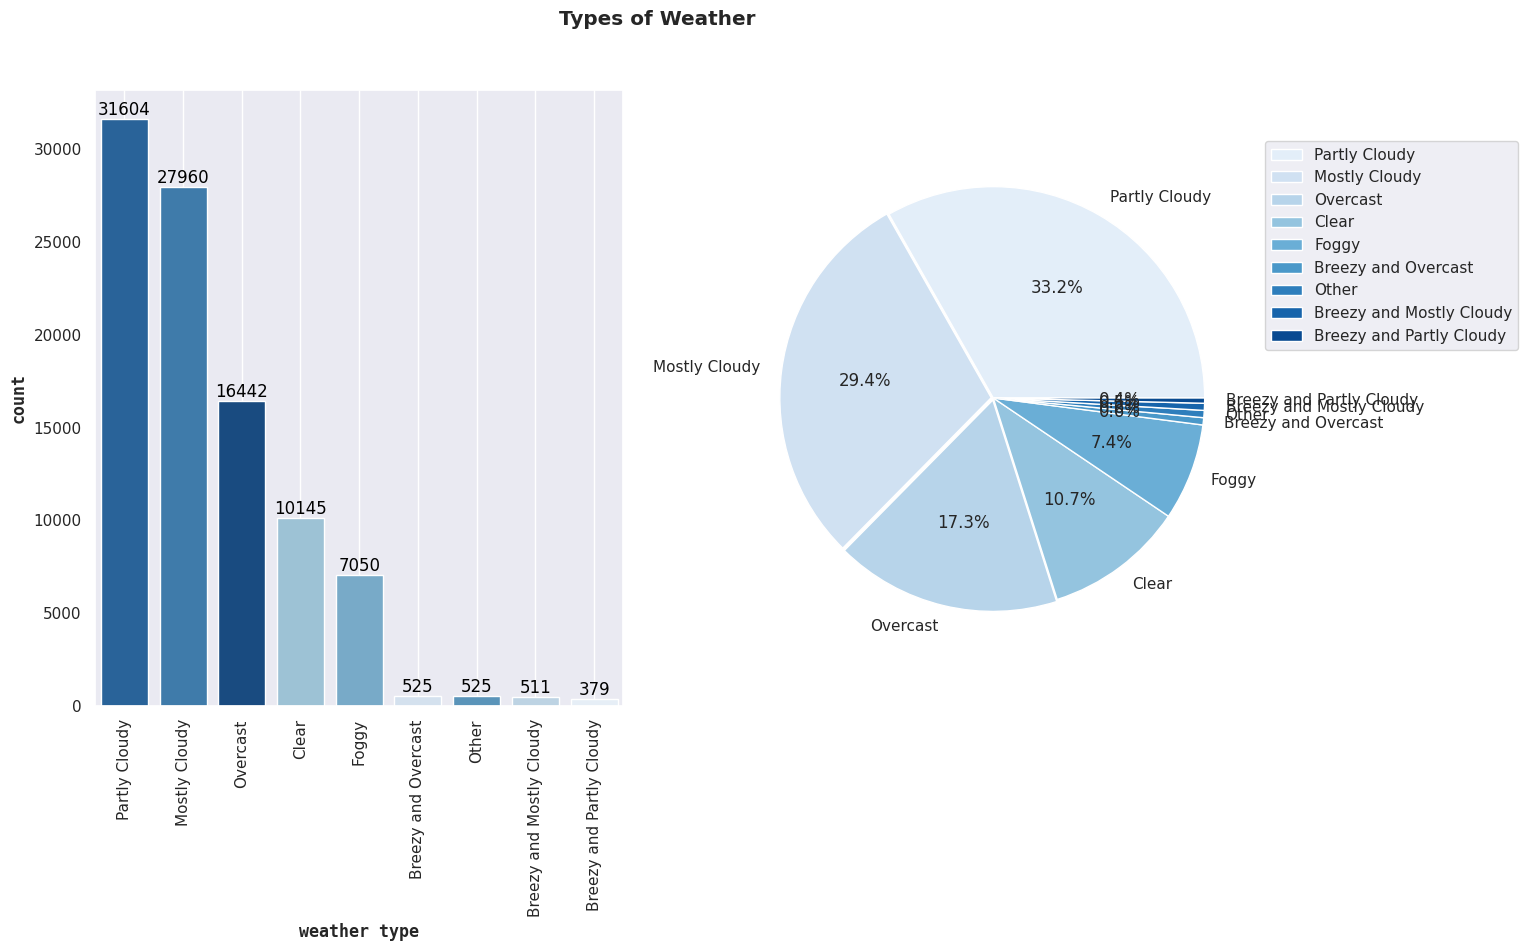

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['Summary'].value_counts().index
y=df['Summary'].value_counts().values.tolist()
data = df.groupby("Summary").size()

sns.set(style="dark", color_codes=True)
pal = sns.color_palette("Blues", len(data))
rank = data.argsort().argsort()

#Create a barplot
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
#Assign values to bars
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

ax[0].set_xlabel('weather type',weight='semibold', fontname = 'monospace')
ax[0].set_ylabel('count',weight='semibold', fontname = 'monospace')
ax[0].xaxis.set_tick_params(rotation=90)
ax[0].grid()

#Create a pie chart, _, _,
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
explode=[0,.01, 0.01,0,0 ,0,0,0,0])

plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of Weather',weight = 'bold')
plt.show()


In [ ]:
df['Precip Type'].value_counts()

rain    84092
snow    10532
none      517
Name: Precip Type, dtype: int64

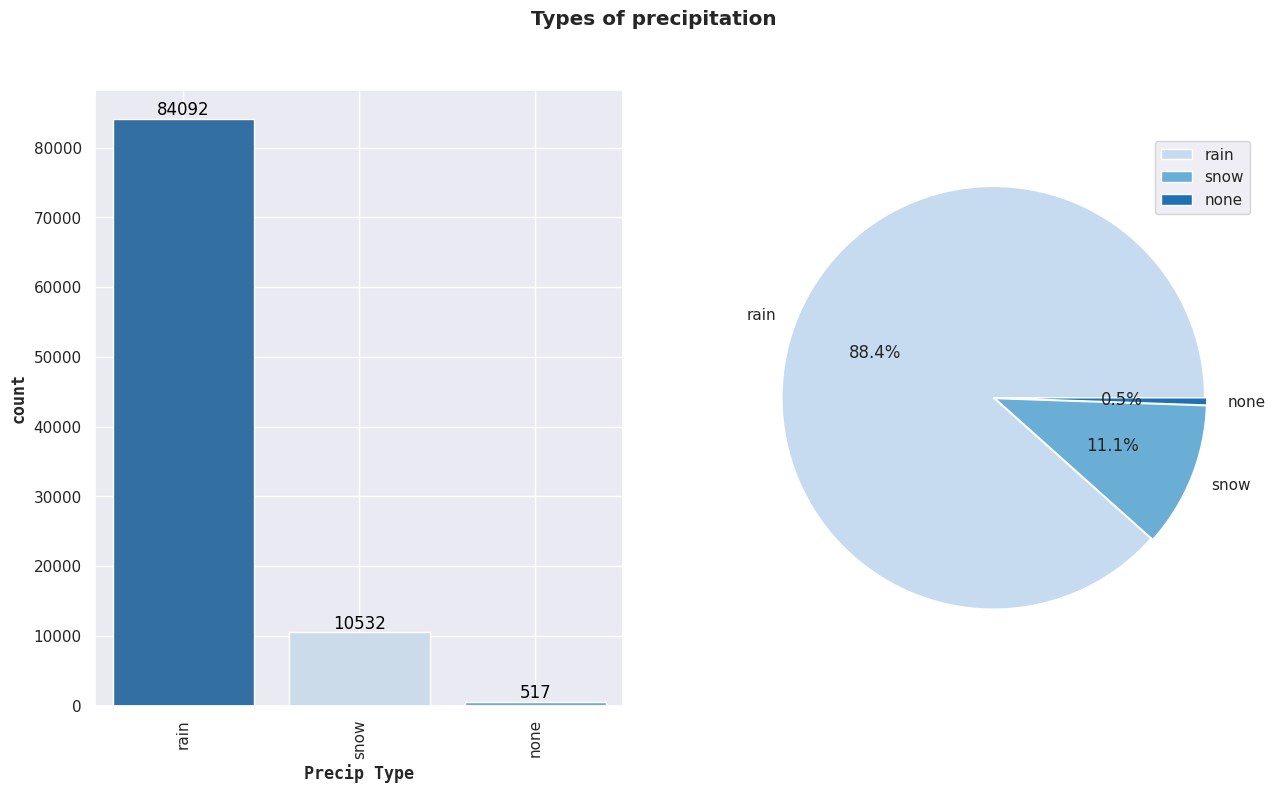

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['Precip Type'].value_counts().index
y=df['Precip Type'].value_counts().values.tolist()
data = df.groupby("Precip Type").size()

sns.set(style="dark", color_codes=True)
pal = sns.color_palette("Blues", len(data))
rank = data.argsort().argsort()

# Create a barplot
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
# Assign values to bars
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

ax[0].set_xlabel('Precip Type',weight='semibold', fontname = 'monospace')
ax[0].set_ylabel('count',weight='semibold', fontname = 'monospace')
ax[0].xaxis.set_tick_params(rotation=90)
ax[0].grid()

# Create a pie chart,
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0,.01, 0.01])


plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of precipitation ',weight = 'bold')
plt.show()

Text(0.5, 1.0, 'Dependence of visibility on weather conditions')

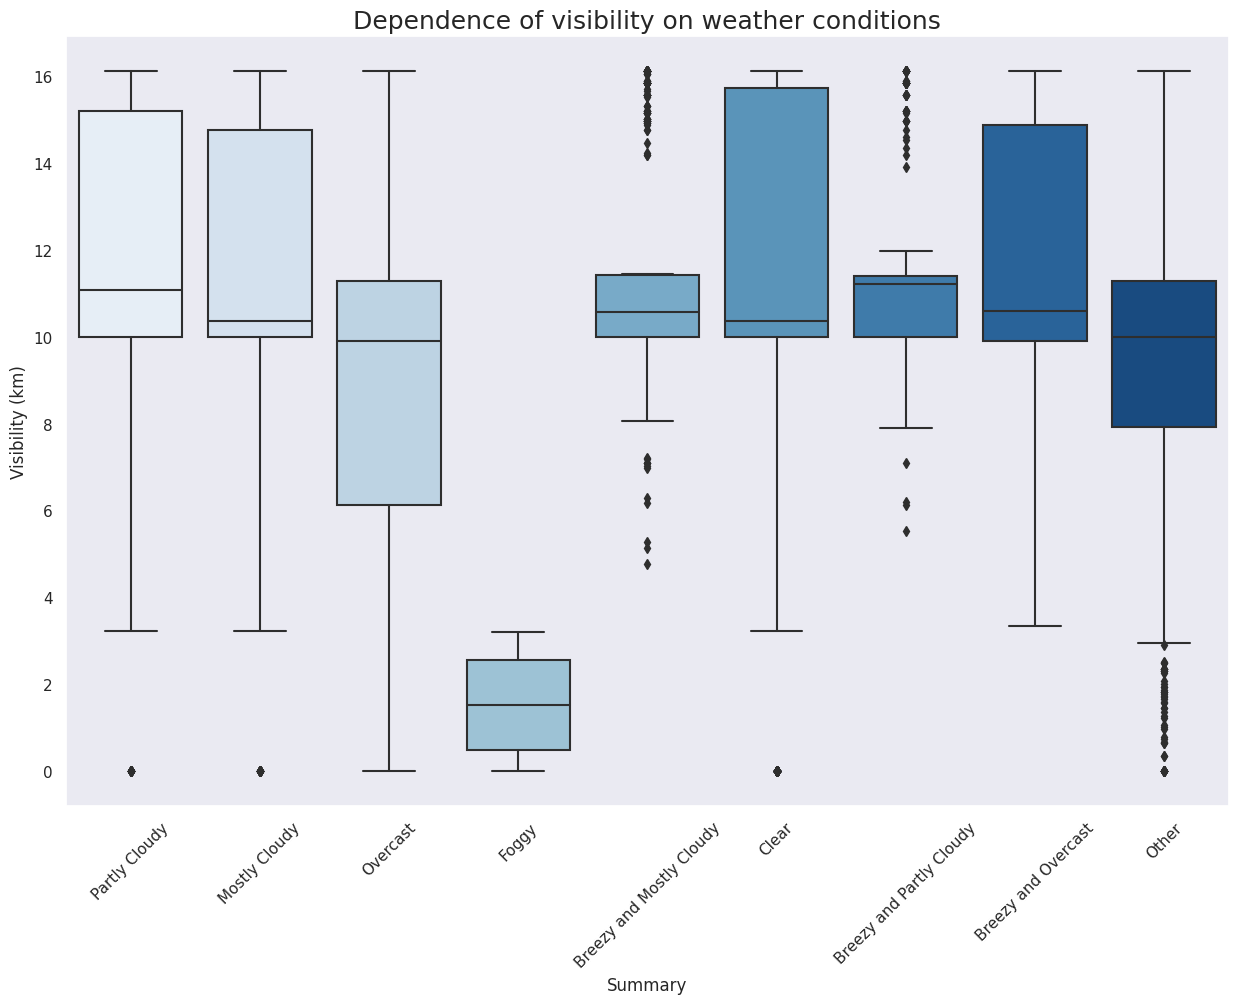

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))

sns.set_style('darkgrid')
sns.boxplot(x='Summary',y='Visibility (km)',data=df, palette ="Blues")
ax.xaxis.set_tick_params(rotation=45)
plt.title('Dependence of visibility on weather conditions', fontsize = "18")

Observation: variable clear contains outliers, incorrect values 0

In [ ]:
# providing variable clear outliers
Clear_outliers = df.loc[(df.Summary == 'Clear') & (df["Visibility (km)"] == 0)]
Clear_outliers

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
14120,2007-03-19 08:00:00.000 +0100,Clear,rain,10.555556,10.555556,0.63,3.2200,110.0,0.0,996.60
14123,2007-03-19 11:00:00.000 +0100,Clear,rain,15.000000,15.000000,0.46,11.2700,150.0,0.0,994.70
26352,2009-04-10 00:00:00.000 +0200,Clear,rain,10.555556,10.555556,0.66,3.2200,320.0,0.0,1017.20
26664,2009-04-22 00:00:00.000 +0200,Clear,rain,13.333333,13.333333,0.47,14.4900,30.0,0.0,1015.00
26665,2009-04-22 01:00:00.000 +0200,Clear,rain,12.222222,12.222222,0.50,11.2700,40.0,0.0,1015.70
...,...,...,...,...,...,...,...,...,...,...
95575,2016-10-31 10:00:00.000 +0100,Clear,none,7.688889,6.177778,0.75,8.5813,264.0,0.0,1024.20
95576,2016-10-31 11:00:00.000 +0100,Clear,none,9.594444,7.972222,0.71,11.1251,276.0,0.0,1023.70
95577,2016-10-31 12:00:00.000 +0100,Clear,none,11.494444,11.494444,0.69,14.0553,284.0,0.0,1023.06
95578,2016-10-31 13:00:00.000 +0100,Clear,none,12.766667,12.766667,0.67,22.5400,286.0,0.0,1022.49


Observation: Rain is not possible with a clear sky

In [ ]:
# removing invalid clear value
df = df.loc[~((df.Summary == 'Clear') & (df["Visibility (km)"] == 0))]


Text(0.5, 1.0, 'Dependence of visibility on weather conditions')

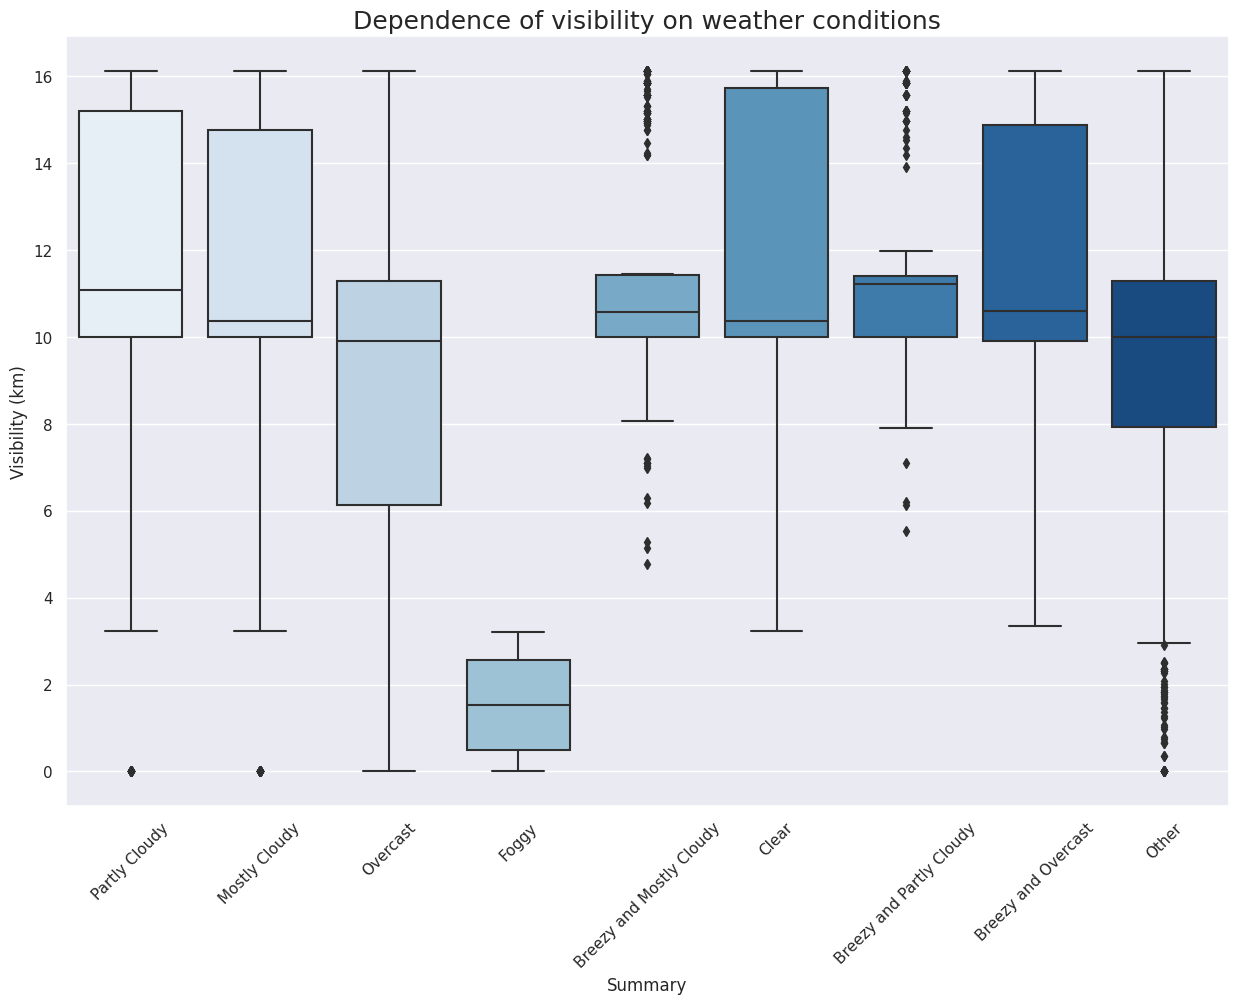

In [ ]:
# checking value
fig,ax=plt.subplots(figsize=(15,10))

sns.set_style('darkgrid')
sns.boxplot(x='Summary',y='Visibility (km)',data=df, palette ="Blues")
ax.xaxis.set_tick_params(rotation=45)
plt.title('Dependence of visibility on weather conditions', fontsize = "18")

Observation: Incorrect value clear was correctly removed and we should check mostly cloudy value 0

In [ ]:
df.loc[((df.Summary == 'Mostly Cloudy') & (df["Visibility (km)"] == 0))]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
94268,2016-11-01 00:00:00.000 +0100,Mostly Cloudy,none,6.205556,4.527778,0.92,8.1466,297.0,0.0,1021.74
94269,2016-11-01 01:00:00.000 +0100,Mostly Cloudy,none,5.827778,4.177778,0.92,7.7763,296.0,0.0,1021.69
94534,2016-11-02 02:00:00.000 +0100,Mostly Cloudy,none,7.361111,5.616667,0.90,9.3863,232.0,0.0,1019.66
94535,2016-11-02 03:00:00.000 +0100,Mostly Cloudy,none,7.444444,5.577778,0.89,10.0786,251.0,0.0,1019.51
94536,2016-11-02 04:00:00.000 +0100,Mostly Cloudy,none,7.477778,5.427778,0.88,11.1090,270.0,0.0,1019.49
94537,2016-11-02 05:00:00.000 +0100,Mostly Cloudy,none,7.355556,5.116667,0.86,12.0750,282.0,0.0,1019.73
94538,2016-11-02 06:00:00.000 +0100,Mostly Cloudy,none,7.311111,4.716667,0.84,14.2485,297.0,0.0,1019.98
94539,2016-11-02 07:00:00.000 +0100,Mostly Cloudy,none,7.344444,4.372222,0.82,17.1465,307.0,0.0,1020.26
94540,2016-11-02 08:00:00.000 +0100,Mostly Cloudy,none,7.122222,4.800000,0.83,12.2682,303.0,0.0,1020.52
94541,2016-11-02 09:00:00.000 +0100,Mostly Cloudy,none,7.250000,5.800000,0.82,7.9695,292.0,0.0,1020.71


Exploring Numerical/Float variables

Text(0.5, 1.0, 'Dependence of visibility on weather conditions')

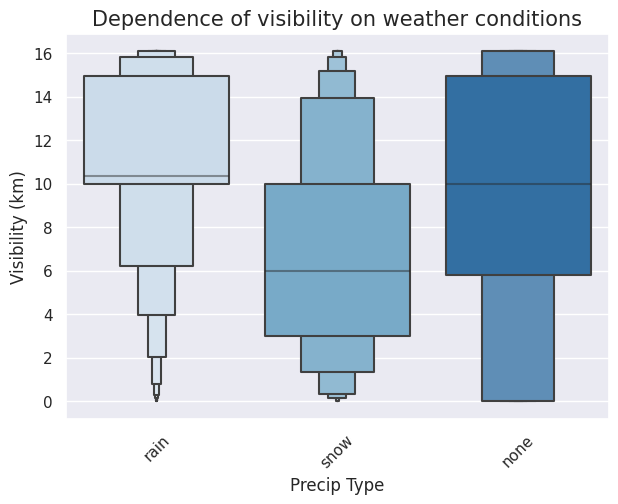

In [ ]:
fig,ax=plt.subplots(figsize=(7,5))

sns.set_style('darkgrid')
sns.boxenplot(x='Precip Type',y='Visibility (km)',data=df, palette ="Blues")
ax.xaxis.set_tick_params(rotation=45)
plt.title('Dependence of visibility on weather conditions', fontsize = "15")

Observation: Snow reduces visibility more than rain

Exploring Numerlical Columns/Features

<ipython-input-446-3200532c3319>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=df.corr()


<Axes: >

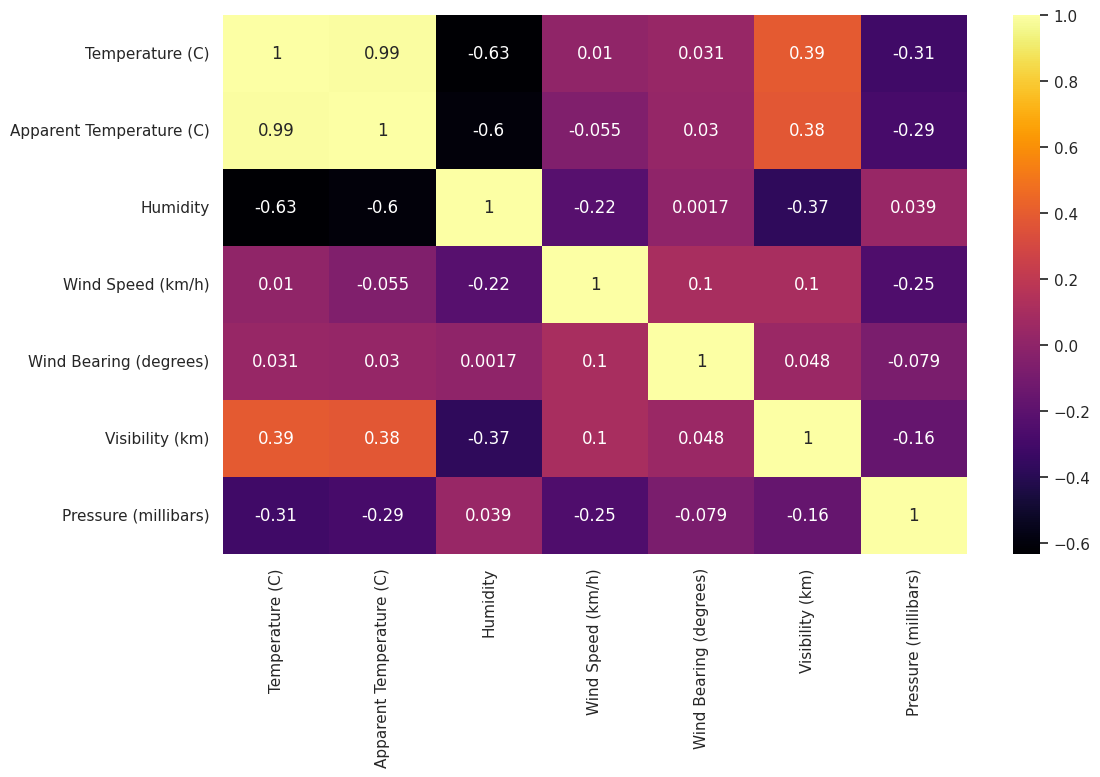

In [ ]:
corr_df=df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_df,annot=True,fmt='.2g',cmap='inferno')

Observation: Apparent temperature is too correlated with the temperature, so it needs to be removed

In [ ]:
#removing Apparent Temperature
df.drop(['Apparent Temperature (C)'],axis = 1,inplace = True)

# Data Preprocessing

In [ ]:
#changing categorical data to numerical
df_cat = df[['Summary', 'Precip Type']]
df_cat = pd.get_dummies(data=df_cat, drop_first=True)
df=pd.concat([df, df_cat], axis=1)
df.drop(['Summary', 'Precip Type'],axis = 1,inplace = True)

In [ ]:
df.head()

,Formatted Date,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy and Overcast,Summary_Breezy and Partly Cloudy,Summary_Clear,Summary_Foggy,Summary_Mostly Cloudy,Summary_Other,Summary_Overcast,Summary_Partly Cloudy,Precip Type_rain,Precip Type_snow
0,2006-04-01 00:00:00.000 +0200,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,0,0,0,0,1,1,0
1,2006-04-01 01:00:00.000 +0200,9.355556,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,0,0,0,0,1,1,0
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,0,0,0,1,0,0,0,1,0
3,2006-04-01 03:00:00.000 +0200,8.288889,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,0,0,0,0,1,1,0
4,2006-04-01 04:00:00.000 +0200,8.755556,0.83,11.0446,259.0,15.8263,1016.51,0,0,0,0,1,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94993 entries, 0 to 96452
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Formatted Date                    94993 non-null  object 
 1   Temperature (C)                   94993 non-null  float64
 2   Humidity                          94993 non-null  float64
 3   Wind Speed (km/h)                 94993 non-null  float64
 4   Wind Bearing (degrees)            94993 non-null  float64
 5   Visibility (km)                   94993 non-null  float64
 6   Pressure (millibars)              94993 non-null  float64
 7   Summary_Breezy and Overcast       94993 non-null  uint8  
 8   Summary_Breezy and Partly Cloudy  94993 non-null  uint8  
 9   Summary_Clear                     94993 non-null  uint8  
 10  Summary_Foggy                     94993 non-null  uint8  
 11  Summary_Mostly Cloudy             94993 non-null  uint8  
 12  Summ

# Feature Scaling

In [ ]:
df.columns

Index(['Formatted Date', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Summary_Breezy and Overcast', 'Summary_Breezy and Partly Cloudy',
       'Summary_Clear', 'Summary_Foggy', 'Summary_Mostly Cloudy',
       'Summary_Other', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Precip Type_rain', 'Precip Type_snow'],
      dtype='object')

In [ ]:
# prepare variable
y = df['Temperature (C)'] # the target variable
X = df[['Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Summary_Breezy and Overcast', 'Summary_Breezy and Partly Cloudy',
       'Summary_Clear', 'Summary_Foggy', 'Summary_Mostly Cloudy',
       'Summary_Other', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Precip Type_rain', 'Precip Type_snow'
      ]] # the features excluding the target variable




In [ ]:
# split data into train and test with an 8:2 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111)

In [ ]:
# standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)

In [ ]:
# scale test data
X_test_scaled=scaler.transform(X_test)

## LinearRegression

In [ ]:
reg_model = LinearRegression()
reg_model.fit(X_train_scaled,y_train)
y_pred = reg_model.predict(X_test_scaled)


In [ ]:

print('Linear Regression R2 score: '+ str(round(r2_score(y_test, y_pred),2)))

print('')
print('Linear Regression MAE score: '+ str(round(mae(y_test, y_pred),2)))

print('')
print('Linear Regression RMSE score: '+ str(round(mse(y_test, y_pred, squared=False),2)))


Linear Regression R2 score: 0.65

Linear Regression MAE score: 4.6

Linear Regression RMSE score: 5.65


## Polynomial regression

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train,y_train)
y_pred_pol = poly_reg_model.predict(X_poly_test)

In [ ]:
print('Polynomial regression R2 score: '+ str(round(r2_score(y_test, y_pred_pol),2)))

print('')
print('Polynomial regression MAE score: '+ str(round(mae(y_test, y_pred_pol),2)))

print('')
print('Polynomial regression RMSE score: '+ str(round(mse(y_test, y_pred_pol, squared=False),2)))


Polynomial regression R2 score: 0.71

Polynomial regression MAE score: 4.12

Polynomial regression RMSE score: 5.16


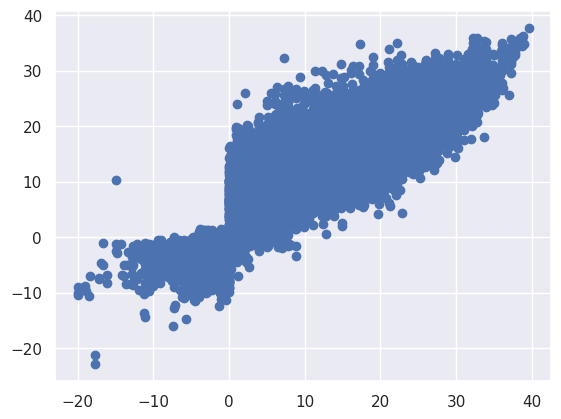

In [ ]:
plt.scatter(y_test,y_pred_pol)

## Decision Tree Regressor

In [ ]:
tree_model = tree.DecisionTreeRegressor(random_state=111, min_samples_split=500)
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)

In [ ]:
print('Decision Tree Regressor R2 score: '+ str(round(r2_score(y_test, y_pred_tree),2)))

print('')
print('Decision Tree Regressor MAE score: '+ str(round(mae(y_test, y_pred_tree),2)))

print('')
print('Decision Tree Regressor RMSE score: '+ str(round(mse(y_test, y_pred_tree, squared=False),2)))


Decision Tree Regressor R2 score: 0.72

Decision Tree Regressor MAE score: 3.94

Decision Tree Regressor RMSE score: 5.04


In [ ]:
for i in range(300,1500,100):
  tree_model = tree.DecisionTreeRegressor(random_state=111, min_samples_split=int(i))
  tree_model.fit(X_train_scaled, y_train)

  y_pred = tree_model.predict(X_test_scaled)
  print(r2_score(y_test, y_pred))

0.7220466690810198
0.7211027991212492
0.719939270815463
0.7182166434625625
0.7178865466269226
0.7162173229811687
0.7146148560648766
0.7132580647838271
0.7120873904422381
0.7104664681871076
0.7094650965024127
0.7086627487697637


In [ ]:
"""model = DecisionTreeRegressor()
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(5, 12),
                                'min_samples_split': range(400, 1000, 100)
                                },
                  cv=10,
                  scoring='neg_mean_absolute_error')
gs.fit(X_train_scaled,y_train)
print(gs.best_params_)
print(-gs.best_score_)"""

"model = DecisionTreeRegressor()\ngs = GridSearchCV(model,\n                  param_grid = {'max_depth': range(5, 12),\n                                'min_samples_split': range(400, 1000, 100)\n                                },\n                  cv=10,\n                  scoring='neg_mean_absolute_error')\ngs.fit(X_train_scaled,y_train)\nprint(gs.best_params_)\nprint(-gs.best_score_)"

In [ ]:
tree_model = tree.DecisionTreeRegressor(random_state=111, max_depth=11, min_samples_split=400)
tree_model.fit(X_train_scaled, y_train)
y_pred = tree_model.predict(X_test_scaled)

In [ ]:
print(r2_score(y_test, y_pred))

0.7184472657886434


In [ ]:

feat_importance = tree_model.tree_.compute_feature_importances(normalize=False)
feat_importance = pd.concat([X.columns.to_series().reset_index(drop=True), pd.Series(feat_importance)], axis=1)
feat_importance = feat_importance.sort_values(feat_importance.columns[1], ascending = False)
feat_importance

,0,1
0,Humidity,33.762487
14,Precip Type_snow,19.217625
4,Pressure (millibars),6.582782
3,Visibility (km),3.996452
1,Wind Speed (km/h),2.542569
11,Summary_Overcast,0.476385
2,Wind Bearing (degrees),0.460724
9,Summary_Mostly Cloudy,0.144568
12,Summary_Partly Cloudy,0.033794
7,Summary_Clear,0.005955


In [ ]:
regr = RandomForestRegressor(max_depth=15
                             , random_state=111,n_estimators =100)
regr.fit(X_train_scaled, y_train)
y_pred = regr.predict(X_test_scaled)
print(r2_score(y_test, y_pred))

0.7552264377828097


In [ ]:
model = XGBRegressor(learning_rate=0.1, n_estimators=150)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(r2_score(y_test, y_pred))


0.7560939141188296
